In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

df = pd.read_csv("../data_lightgbm/cleaned_race_results_for_lightgbm.csv")
race_counts = df["race_id"].value_counts()
races_with_16 = race_counts[race_counts == 16].index
df = df[df["race_id"].isin(races_with_16)]

In [3]:
columns_to_drop = ["final_time", "avg_final_time_hist", "horse_weight", "jockey_weight"]
df = df.drop(columns=columns_to_drop)

In [4]:
target = "top1"
exclude_cols = ["race_id", "horse_id", "finish_position", "top1"]
features = [col for col in df.columns if col not in exclude_cols]

X = df[features]
y = df[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = lgb.LGBMClassifier(objective="binary", is_unbalance=True, random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 839, number of negative: 12204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 13043, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.064326 -> initscore=-2.677308
[LightGBM] [Info] Start training from score -2.677308


LGBMClassifier(is_unbalance=True, objective='binary', random_state=42)

In [7]:
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [8]:
print(importance_df.head(20))

              Feature  Importance
3        total_weight         695
51          speed_mps         554
52      avg_speed_mps         531
0            favorite         324
1      bracket_number         235
4                 age         168
10               top3          59
2      track_distance          57
17  weather_weather01          52
18  weather_weather02          41
8               sex_h          36
13           grade_g3          29
6               sex_f          27
9               sex_m          25
12           grade_g2          20
25     race_type_1600          18
5               sex_c          17
19  weather_weather03          17
27     race_type_1800          14
11           grade_g1          14


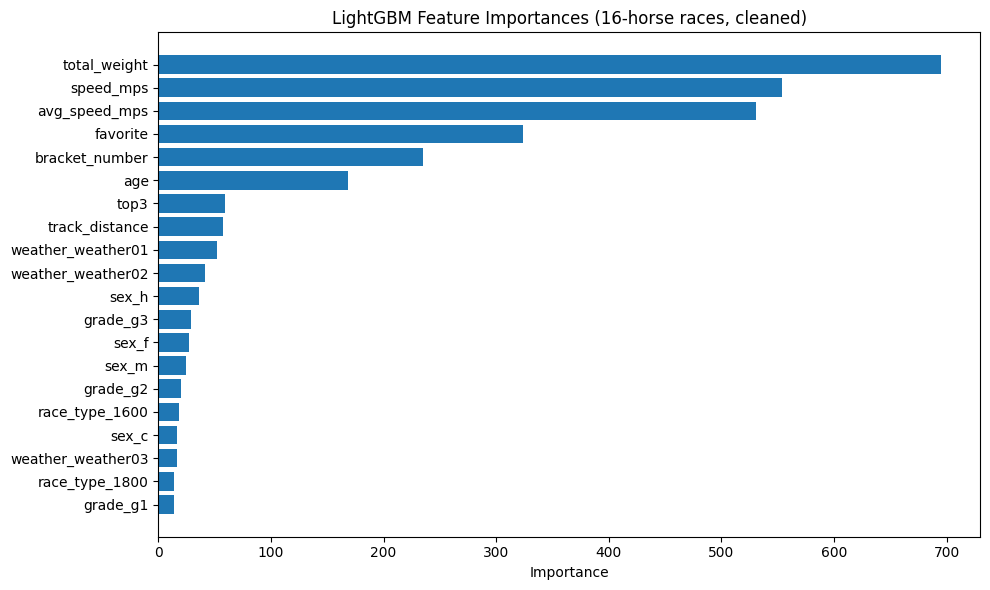

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:20], importance_df["Importance"][:20])
plt.xlabel("Importance")
plt.title("LightGBM Feature Importances (16-horse races, cleaned)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()